# 08. Как решать задачи

Основные материалы занятия - в слайдах. Тут задачки для разминки.

In [1]:
import os
import glob

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
train_csv_fn = "./train.csv"

In [3]:
with open(train_csv_fn, "rt") as fp:
    train_df = pd.read_csv(fp)
train_df.head()

,filename,class_number
0,000000.png,18
1,000001.png,18
2,000002.png,18
3,000003.png,18
4,000004.png,9


**Задача 1**: 
* Получить распределение количества примеров для всех классов из `train.csv`.
* Пусть функция `get_class_counts()` вернет словарь с ключами = метками классов и значениями = количеством примеров данного класса в выборке

In [4]:
def get_class_counts(df):
    
    # YOUR CODE HERE
    
    # ...
    # class_counts = ...
    # ...
    
    # END OF YOUR CODE
    
    return class_counts

In [6]:
class_counts = get_class_counts(train_df)

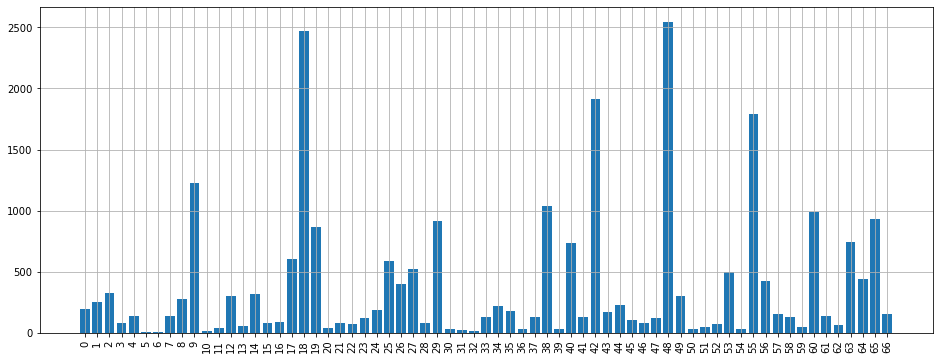

In [7]:
plt.figure(figsize=(16, 6))

items = sorted(class_counts.items(), key=lambda x: x[1], reverse=True)
xs = [it[0] for it in items]
ys = [it[1] for it in items]

plt.bar(xs, ys)
plt.xticks(xs, rotation=90)

plt.grid(True)
plt.show()

**Задача 2**:

* Используя результаты первой задачи, создайте объект для кросс-энтропийного лосса с весами для классов.
* Пусть вес для класса `i` будет вычисляться как `1 / {доля примеров класса i в обучающей выборке}`
* Обратите внимание, в каком виде ожидаются веса в конструкторе `CrossEntropyLoss`.

In [8]:
import torch

from torch.nn import CrossEntropyLoss

In [9]:
def get_weighted_ce_loss(class_counts):
    
    # YOUR CODE HERE

    # ...
    # ce_loss = CrossEntropyLoss(weight=...)

    # END OF YOUR CODE
    
    return ce_loss

In [11]:
loss_weighted = get_weighted_ce_loss(class_counts)

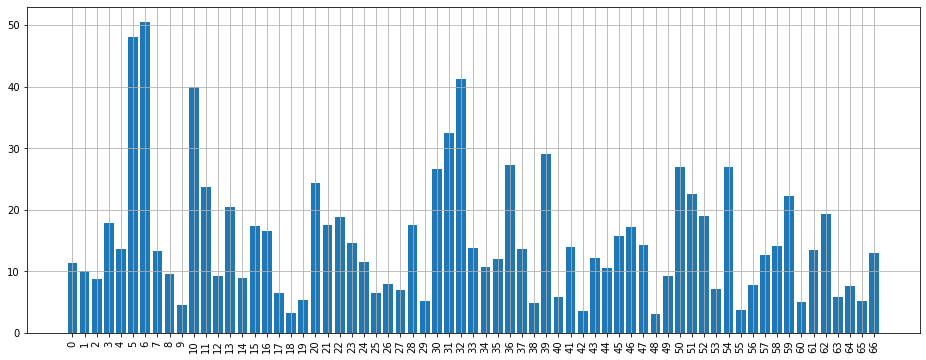

In [12]:
plt.figure(figsize=(16, 6))
plt.bar(range(len(loss_weighted.weight)), loss_weighted.weight)
plt.xticks(range(len(loss_weighted.weight)), rotation=90)
plt.grid(True)

**Задача 3**:
* Написать функцию для вычисления средней яркости изображения (в диапазоне [0..255])

In [13]:
import cv2

In [14]:
train_images_root = "./train"

In [15]:
def compute_image_lightness(basename):
    
    # YOUR CODE HERE
    
    # lightness = ...
    
    # END OF YOUR CODE
    
    return lightness

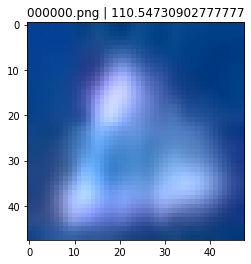

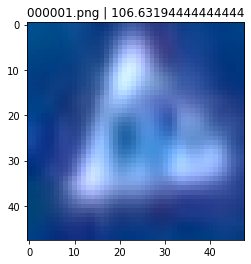

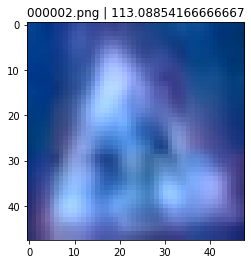

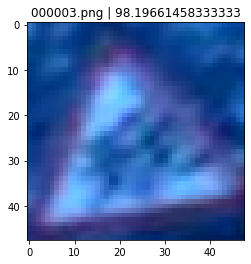

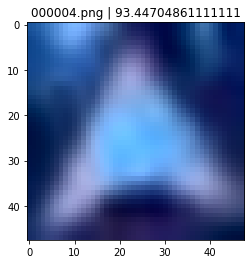

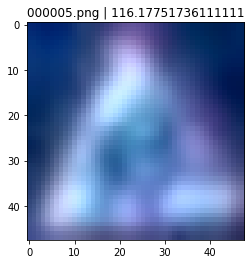

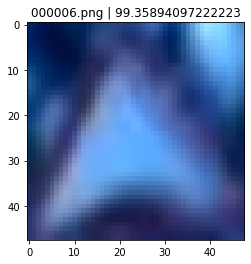

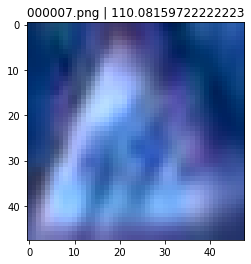

In [17]:
for i in range(8):
    basename = train_df["filename"][i]
    lightness = compute_image_lightness(basename)
    
    image = cv2.imread(os.path.join(train_images_root, basename))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    plt.imshow(image)
    plt.title(f"{basename} | {lightness}")
    plt.show()

**Задача 4**:
* Получить модель архитектуры ResNet18
* Заменить входную "большую" свертку 7x7 на обычную 3х3

In [18]:
from torchvision import models

In [19]:
def get_resnet18_custom():
    
    # YOUR CODE HERE
    
    # ...
    # resnet18_custom = ...
    # ...
    
    # END OF YOUR CODE
    
    return resnet18_custom

In [21]:
resnet18_custom = get_resnet18_custom()
resnet18_custom;

In [22]:
x = torch.randn(1, 3, 48, 48)
y = resnet18_custom(x)
print(y.size())

torch.Size([1, 1000])


[W NNPACK.cpp:51] Could not initialize NNPACK! Reason: Unsupported hardware.
